In [1]:
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
INPUT_IMAGE_NAME = "pikachu.png"
OUTPUT_IMAGE_NAME = "pikachu_19x20.png"
OUTPUT_IMAGE_INFO_NAME = "pikachu_info.json"
OUTPUT_INAPP_IMAGE_NAME = "pikachu_inapp.png"
PIXEL_WIDTH = 19
PIXEL_HEIGHT = 20
TOTAL_DAY = 30

(-0.5, 1140.5, 1200.5, -0.5)

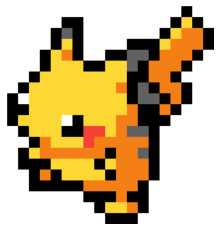

In [3]:
image = Image.open(INPUT_IMAGE_NAME)
plt.imshow(image)
plt.axis("off")

In [4]:
small_img = image.resize((PIXEL_WIDTH,PIXEL_HEIGHT),Image.NEAREST)
small_img.save(OUTPUT_IMAGE_NAME)

C:\Users\hysku\AppData\Local\Temp\ipykernel_1704\3307054081.py:1: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  small_img = image.resize((PIXEL_WIDTH,PIXEL_HEIGHT),Image.NEAREST)


In [5]:
pixels = list(small_img.getdata())
width, height = small_img.size
pixels = [pixels[i * width:(i + 1) * width] for i in range(height)]

In [6]:
# 색칠해야하는 픽셀 구하기
# color_pixel_array, color_pixel_cnt, pixel_fill_array

isColor = lambda pixel:pixel[3] != 0

color_pixel_map = []
color_pixel_array = []
for row_idx, pixel_row in enumerate(pixels):
    color_pixel_map.extend(list(filter(None, [{str(idx)+","+str(row_idx):pixel} if isColor(pixel) else None for idx, pixel in enumerate(pixel_row)])))
    color_pixel_array.extend(list(filter(None, [[pixel, idx, row_idx] if isColor(pixel) else None for idx, pixel in enumerate(pixel_row)])))

color_pixel_cnt = 0
for row in color_pixel_array:
    color_pixel_cnt+=1

pixel_fill_array = []
for pixel_fill_num in range(TOTAL_DAY):
    pixel_fill = int(color_pixel_cnt / (TOTAL_DAY - pixel_fill_num))
    pixel_fill_array.append(pixel_fill)
    color_pixel_cnt -= pixel_fill

color_pixel_map

TypeError: can only concatenate tuple (not "str") to tuple

In [70]:
# 하루당 채워지는 pixel 위치 구하기

import random

pixel_fill_pos_array = []
picked_idx = []
for pixel_per_day in pixel_fill_array:
    pixel_fill_pos_array.append([])
    for pixel in range(pixel_per_day):
        while True:
            rand_idx = random.randint(0, len(color_pixel_array) - 1)
            if rand_idx not in picked_idx:
                pixel_fill_pos_array[len(pixel_fill_pos_array) - 1].append(str(color_pixel_array[rand_idx][1])+","+str(color_pixel_array[rand_idx][2]))
                picked_idx.append(rand_idx)
                break

In [71]:
import json

json_data = {
    "info": {
        "image_name":INPUT_IMAGE_NAME.split('.')[0],
        "total_day": TOTAL_DAY,
        "pixel_width": PIXEL_WIDTH,
        "pixel_height": PIXEL_HEIGHT,
    },
    "data":color_pixel_map,
    "pixel_per_day":pixel_fill_pos_array
}

with open(OUTPUT_IMAGE_INFO_NAME, "w") as json_file:
    json.dump(json_data, json_file)

In [8]:
in_app_img = small_img.resize((PIXEL_WIDTH*100, PIXEL_HEIGHT*100), Image.NEAREST)
in_app_img.save(OUTPUT_INAPP_IMAGE_NAME)

C:\Users\hysku\AppData\Local\Temp\ipykernel_19676\2145696453.py:1: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  in_app_img = small_img.resize((PIXEL_WIDTH*100, PIXEL_HEIGHT*100), Image.NEAREST)


: 